In [160]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
print(sns.__version__)

0.9.0


Versão mais atual até o momento deste documento.

# Alucar - analisando as vendas

In [6]:
alucar = pd.read_csv('../01.Dados/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [8]:
print('Quantidade de linhas e colunas:',alucar.shape)

Quantidade de linhas e colunas: (24, 2)


### Quantos dados nulos temos

In [12]:
print('Quantidade de dados nulos:',alucar.isna().sum().sum())

Quantidade de dados nulos: 0


### Tipos de dados exibidos

In [13]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [16]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Melhora o trabalho com dados temporais

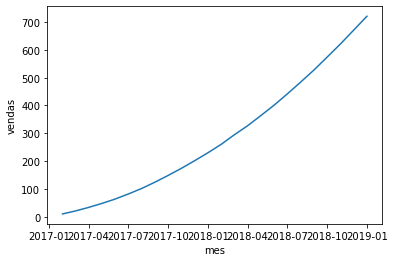

In [23]:
sns.lineplot(x='mes',y='vendas',data=alucar)

Aqui,não mostra muita informação.

Dicas verja o site: urbaninstitue.github.io

### Melhorando a vizualização do dados

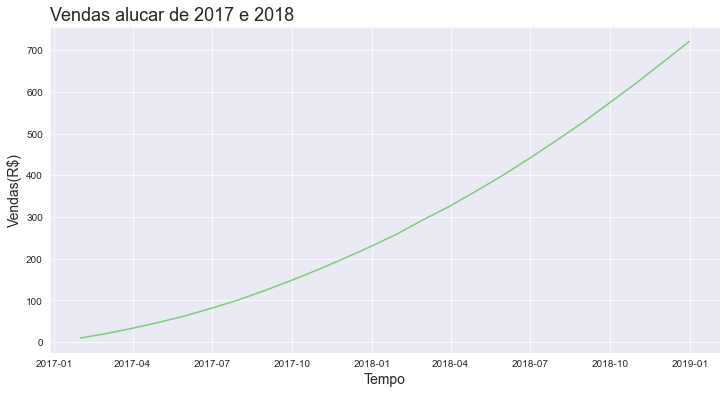

In [33]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas alucar de 2017 e 2018',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas(R$)',fontsize=14)
ax = ax

### Decompor as vendas

In [43]:
def plotar(titulo,labelx,labely,x,y,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y,data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=18)
    ax.set_xlabel(labelx,fontsize=14)
    ax.set_ylabel(labely,fontsize=14)
    ax = ax

In [41]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


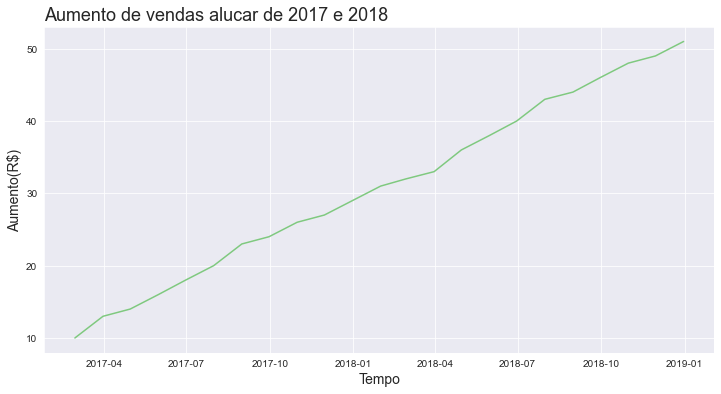

In [44]:
plotar('Aumento de vendas alucar de 2017 e 2018','Tempo','Aumento(R$)','mes','aumento',alucar)

Velocidade

In [46]:
alucar['acelaracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,acelaracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


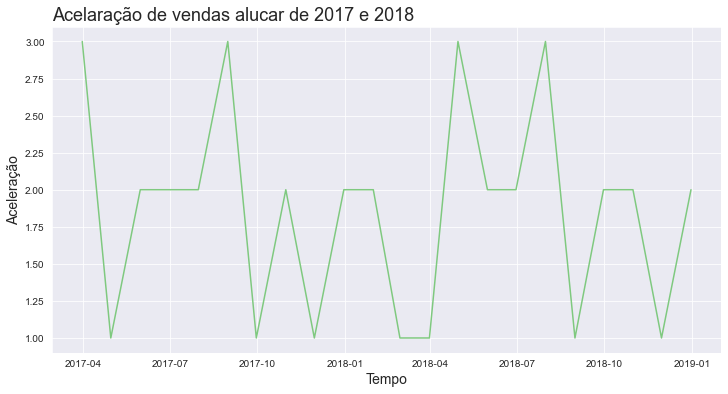

In [49]:
plotar('Acelaração de vendas alucar de 2017 e 2018','Tempo','Aceleração','mes','acelaracao',alucar)

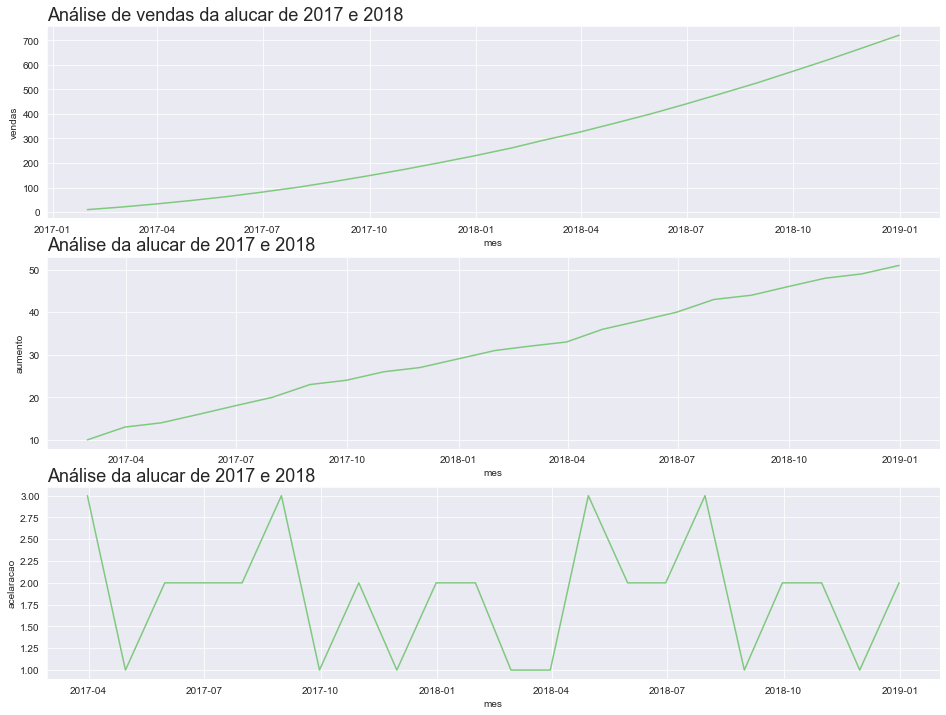

In [52]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da alucar de 2017 e 2018',fontsize=18,loc='left')
sns.lineplot(x='mes',y='vendas',data=alucar)
ax = plt.subplot(3,1,2)
ax.set_title('Análise da alucar de 2017 e 2018',fontsize=18,loc='left')
sns.lineplot(x='mes',y='aumento',data=alucar)
ax = plt.subplot(3,1,3)
ax.set_title('Análise da alucar de 2017 e 2018',fontsize=18,loc='left')
sns.lineplot(x='mes',y='acelaracao',data=alucar)

In [56]:
def plot_comparacao(y1,y2,y3,x='mes',dataset=alucar,titulo='Análise de vendas da alucar de 2017 e 2018'):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)

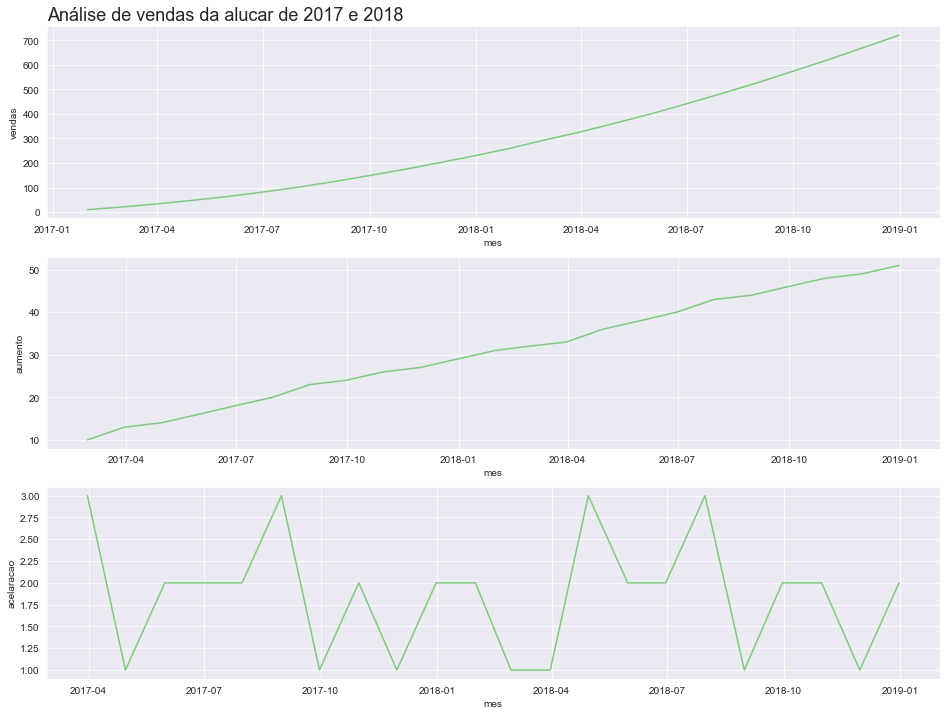

In [58]:
plot_comparacao(y1='vendas',y2='aumento',y3='acelaracao')

## Autocorrelação

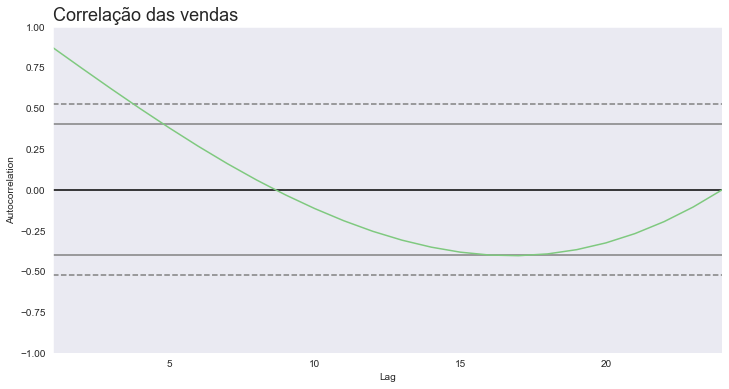

In [78]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12,6))
ax = autocorrelation_plot(alucar['vendas'])
ax.set_title('Correlação das vendas',fontsize=18,loc='left')
ax = ax

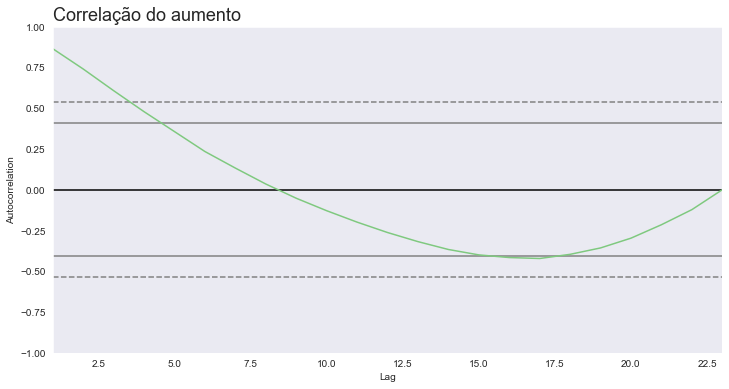

In [80]:
plt.figure(figsize=(12,6))
ax = autocorrelation_plot(alucar['aumento'][1:])
ax.set_title('Correlação do aumento',fontsize=18,loc='left')
ax = ax

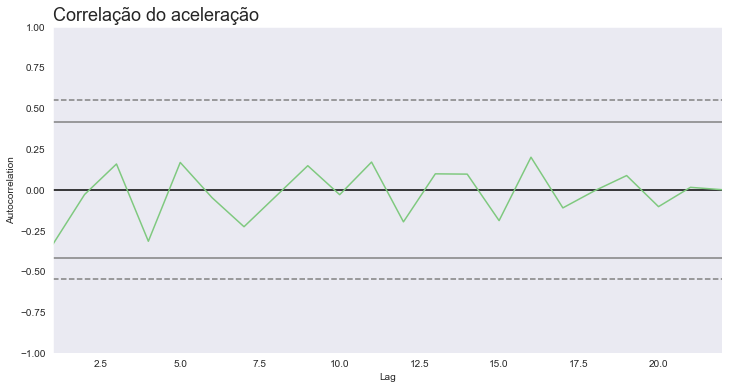

In [82]:
plt.figure(figsize=(12,6))
ax = autocorrelation_plot(alucar['acelaracao'][2:])
ax.set_title('Correlação do aceleração',fontsize=18,loc='left')
ax = ax

## Analisando assinantes da newsletter

In [86]:
assinantes = pd.read_csv('../01.Dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [87]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [88]:
print('Quantidade de linhas e colunas:',assinantes.shape)
print('Quantidade de dados nulos',assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos 0


In [90]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [91]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['acelerecao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,acelerecao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


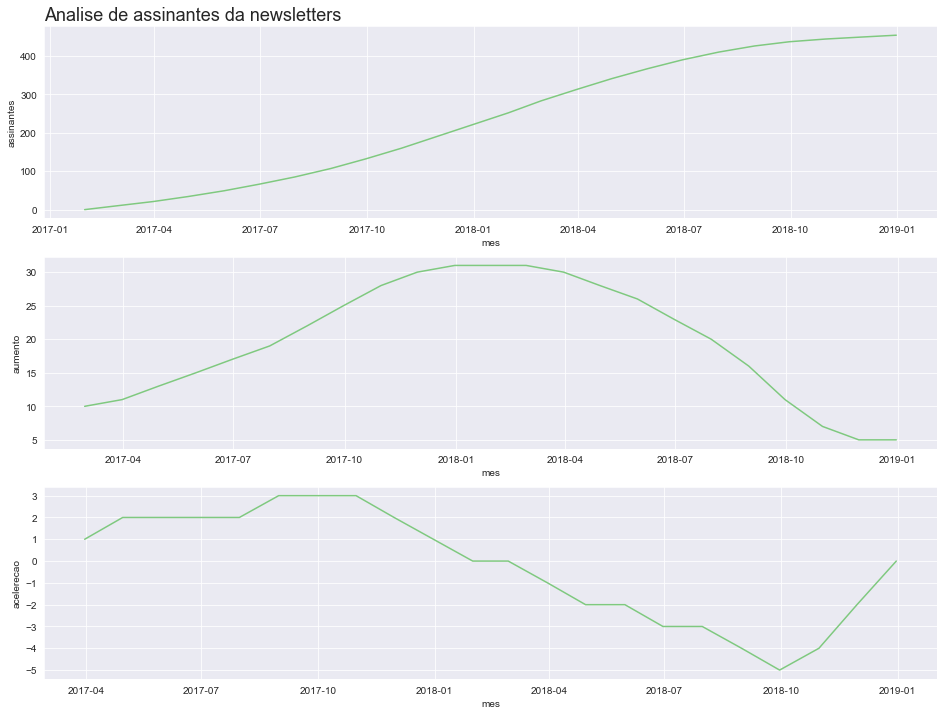

In [97]:
plot_comparacao('assinantes','aumento','acelerecao','mes',assinantes,'Analise de assinantes da newsletters')

# Chocolura - Sazonalidade

In [99]:
chocolura = pd.read_csv('../01.Dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [101]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [102]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [103]:
print('Quantidade de linhas:',chocolura.shape)
print('Quantidade de dados nulos:',chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [104]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


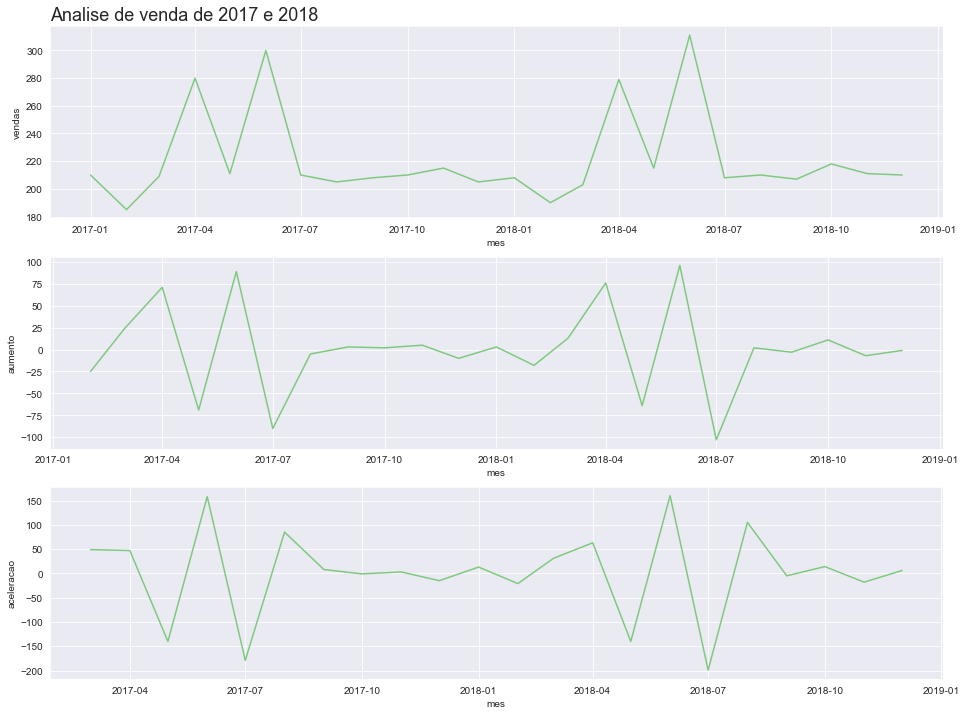

In [106]:
plot_comparacao('vendas','aumento','aceleracao','mes',chocolura,'Analise de venda de 2017 e 2018')

# Chocolura - Venda diárias(outubro e novembro)

In [108]:
vendas_por_dia = pd.read_csv('../01.Dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [111]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes                                                      

dia       datetime64[ns]
vendas             int64
dtype: object

In [113]:
print('Quantidade de linhas e colunas:',vendas_por_dia.shape)
print('Quantidade de dados nulos:',vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [116]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


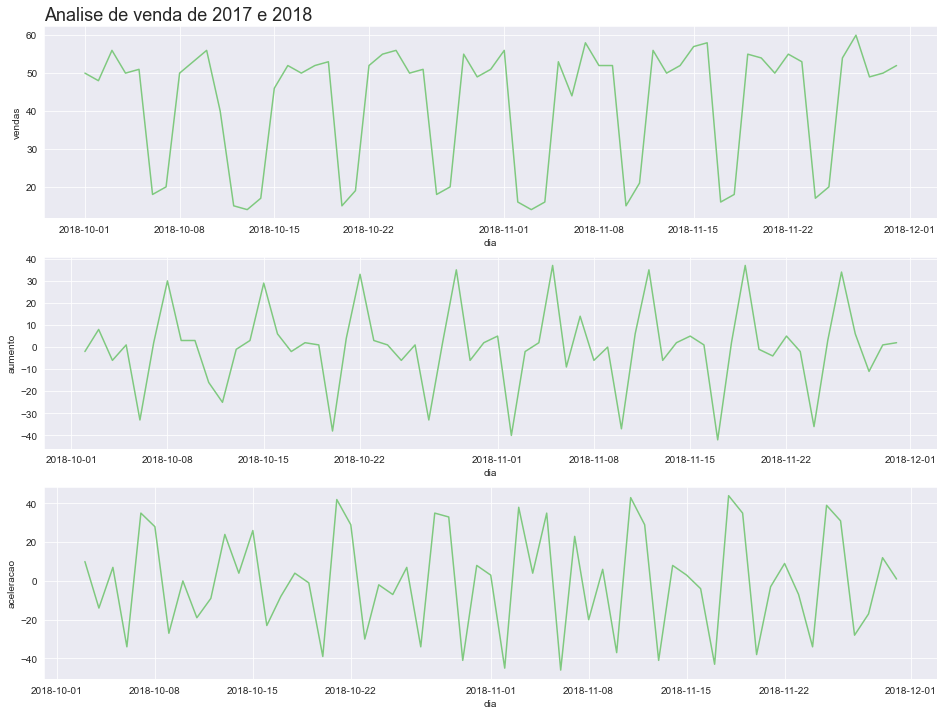

In [118]:
plot_comparacao('vendas','aumento','aceleracao','dia',vendas_por_dia,'Analise de venda de 2017 e 2018')

## Analisando a sazonalidade

In [131]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [132]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [133]:
dias_traduzidos = {'Monday':'Segunda',
                   'Tuesday':'Terça',
                   'Wednesday':'Quarta',
                   'Thursday':'Quinta',
                   'Friday':'Sexta',
                   'Saturday':'Sábado',
                   'Sunday':'Domindo'}

In [134]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [136]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domindo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


### Agrupando os dias

In [137]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()
vendas_agrupadas

<ipython-input-137-a198add870c0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Domindo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


## Correlação das vendas diárias

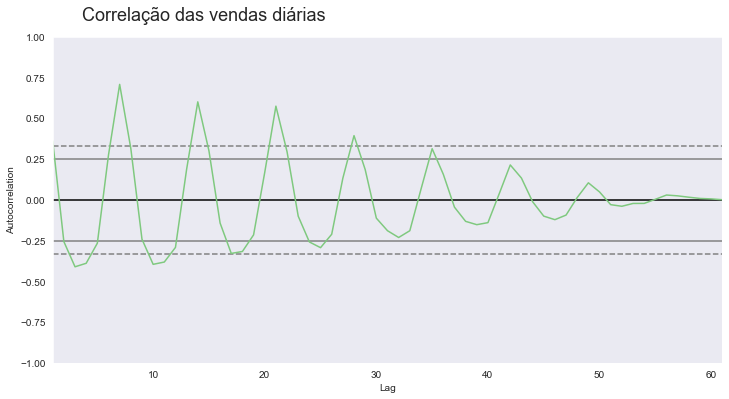

In [138]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

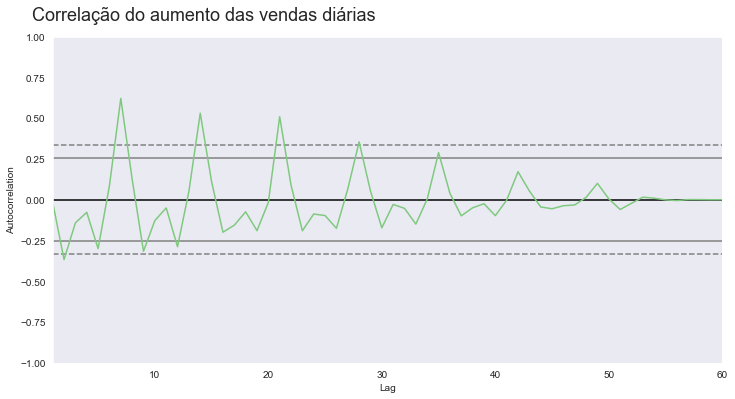

In [139]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

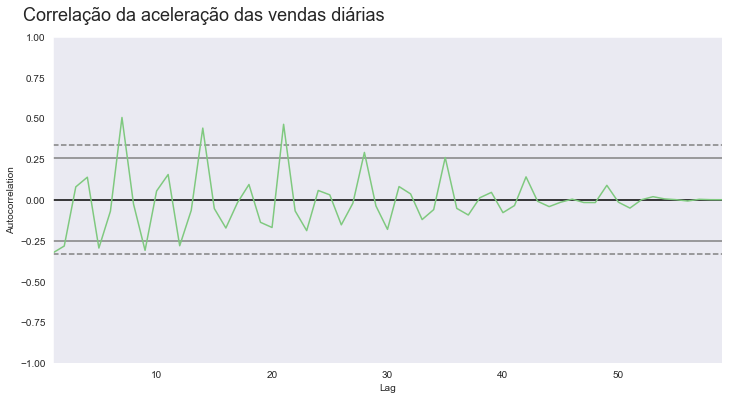

In [140]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

Então vemos que há correlação em todos os parâmetros com o fator de sazonalidade

# Cafelura - analise das vendas

In [142]:
cafelura = pd.read_csv('../01.Dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [143]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [145]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [146]:
print('Qunatidade de linhas e colunas:',cafelura.shape)
print('Quantidade de daos nulos:',cafelura.isna().sum().sum())

Qunatidade de linhas e colunas: (24, 2)
Quantidade de daos nulos: 0


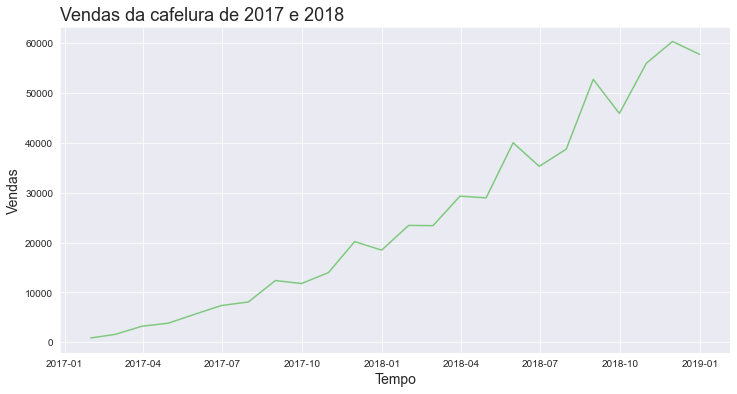

In [148]:
plotar('Vendas da cafelura de 2017 e 2018','Tempo','Vendas','mes','vendas',cafelura)

In [150]:
quantidade_de_dias_de_fds = pd.read_csv('../01.Dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [152]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [154]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias']
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


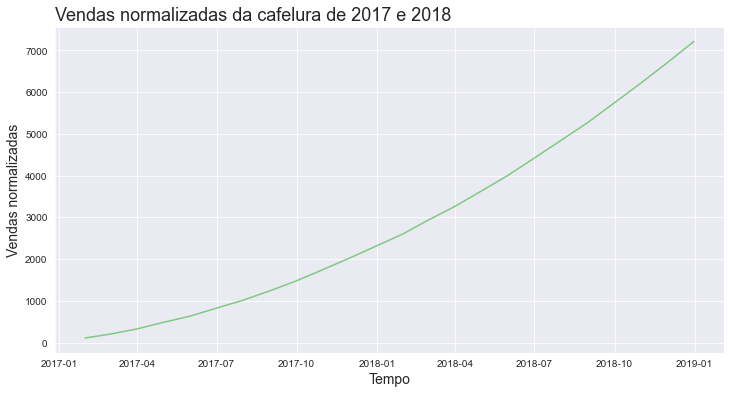

In [155]:
plotar('Vendas normalizadas da cafelura de 2017 e 2018',
       'Tempo','Vendas normalizadas','mes',
       'vendas_normalizadas',cafelura)

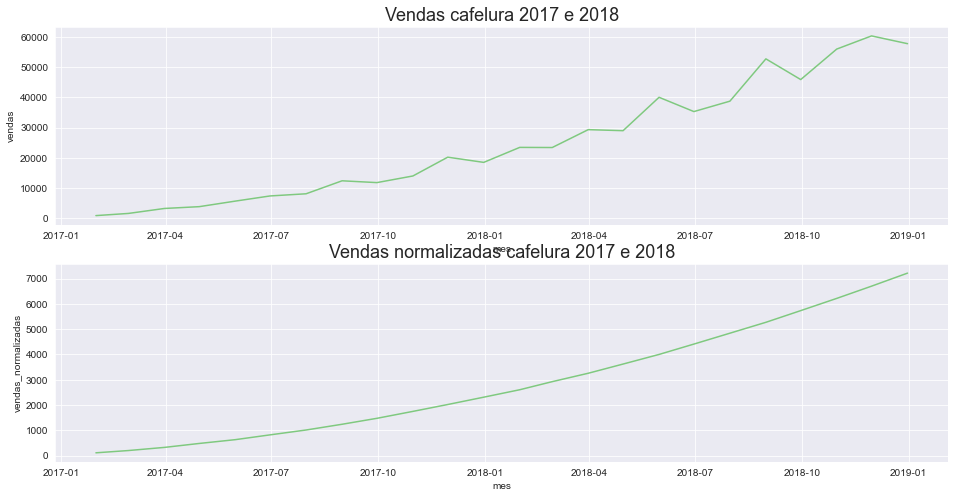

In [158]:
plt.figure(figsize=(16,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas cafelura 2017 e 2018',fontsize=18)
sns.lineplot(x='mes',y='vendas',data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas cafelura 2017 e 2018',fontsize=18)
sns.lineplot(x='mes',y='vendas_normalizadas',data=cafelura)


# Utilizar o statsmodels

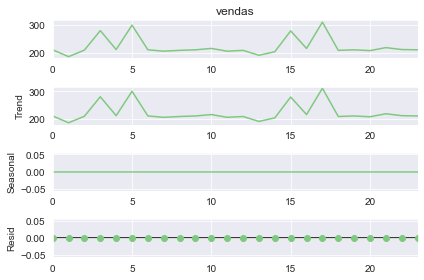

In [164]:
resultado = seasonal_decompose(chocolura['vendas'],period=1)
ax = resultado.plot()

Residual - é o ruído

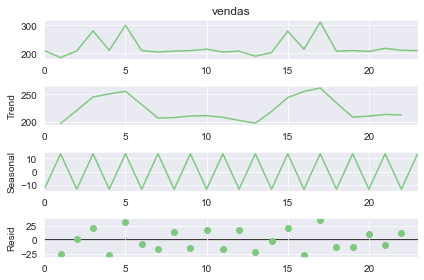

In [165]:
resultado = seasonal_decompose(chocolura['vendas'],period=2)
ax = resultado.plot()

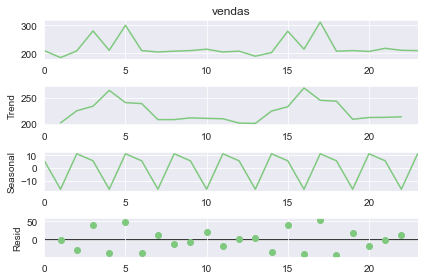

In [166]:
resultado = seasonal_decompose(chocolura['vendas'],period=3)
ax = resultado.plot()

In [168]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [170]:
data = ({
        'Obersevacao':observacao,
        'Tendencia':tendencia,
        'Sazonlidade':sazonalidade,
        'Ruido':ruido 
})

In [172]:
resultado = pd.DataFrame(data)
resultado.head()

,Obersevacao,Tendencia,Sazonlidade,Ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


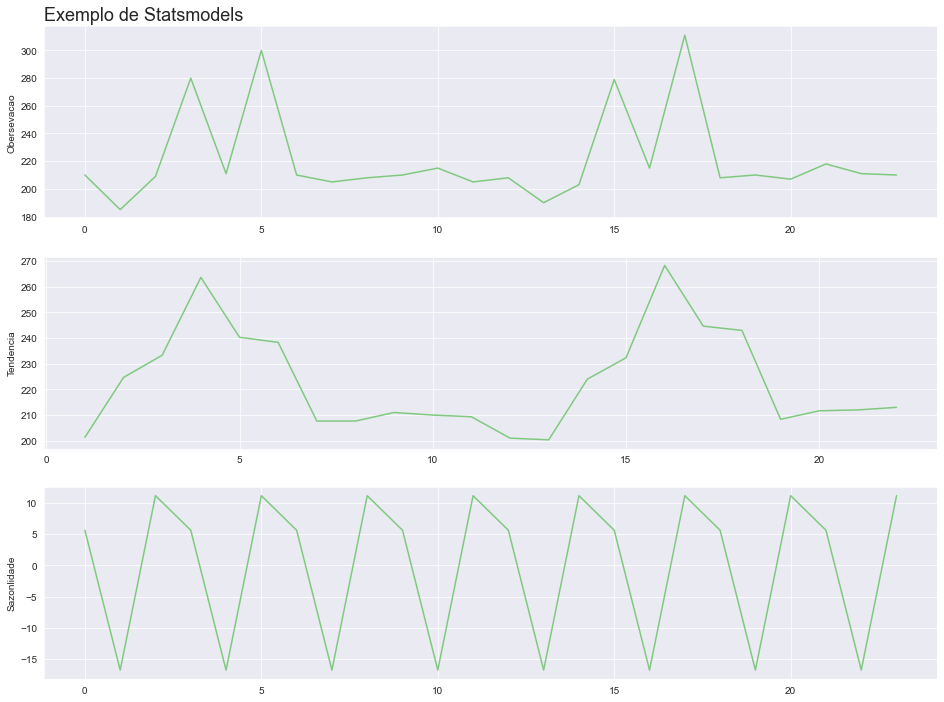

In [178]:
plot_comparacao('Obersevacao','Tendencia','Sazonlidade',resultado.index,resultado,'Exemplo de Statsmodels')

### Com o statsmodels podemos ver tudos que apredemos

# Ruído de uma timeseries

In [179]:
alucel = pd.read_csv('../01.Dados/alucel.csv')
alucel.head()


,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [180]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [182]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [183]:
print('Qunatidade de linhas e colunas:',alucel.shape)
print('Quantidade de daos nulos:',alucel.isna().sum().sum())

Qunatidade de linhas e colunas: (61, 2)
Quantidade de daos nulos: 0


In [184]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


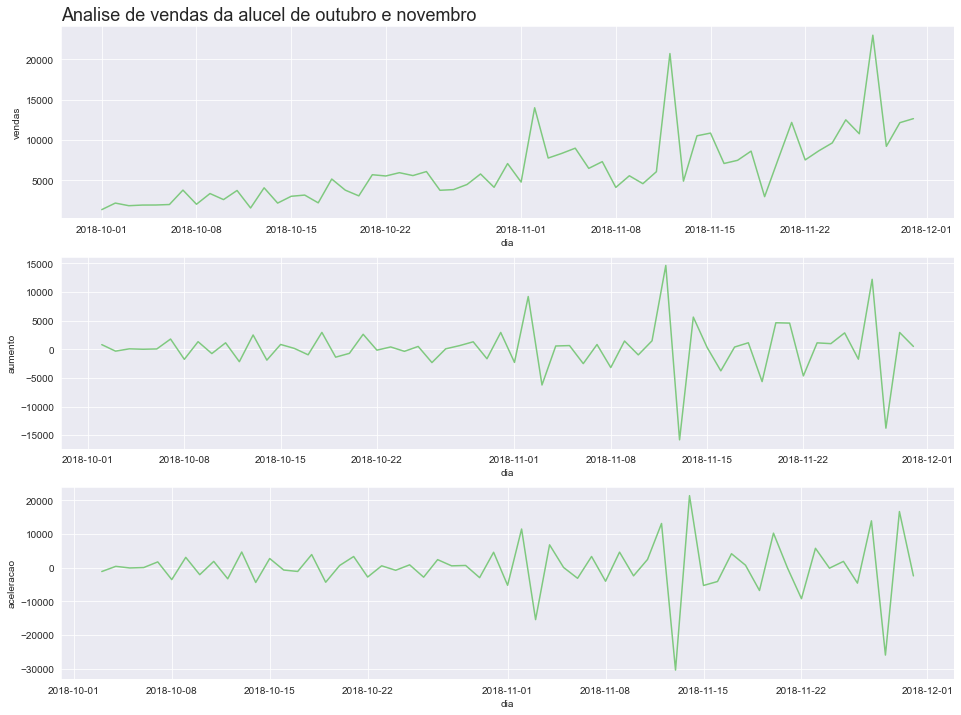

In [185]:
plot_comparacao('vendas','aumento','aceleracao','dia',alucel,'Analise de vendas da alucel de outubro e novembro')

## Média movel para análise de ruído

In [188]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


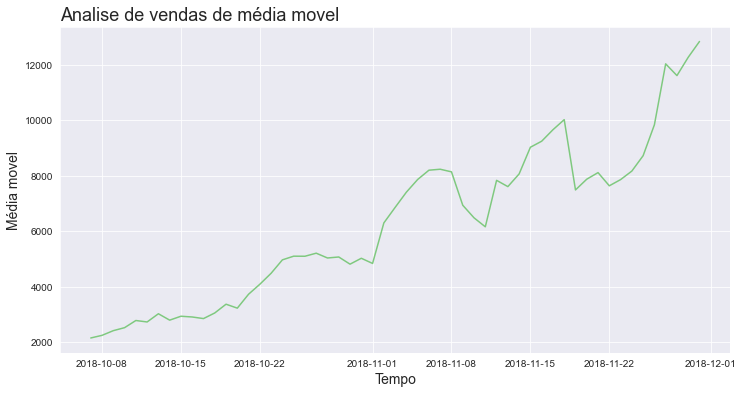

In [189]:
plotar('Analise de vendas de média movel','Tempo','Média movel','dia','media_movel',alucel)

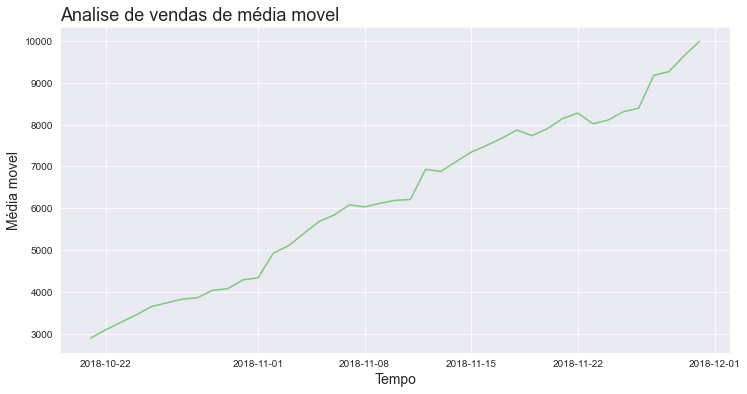

In [190]:
alucel['media_movel'] = alucel['vendas'].rolling(21).mean()
plotar('Analise de vendas de média movel','Tempo','Média movel','dia','media_movel',alucel)